#### Bibliotecas e Base de Dados

In [102]:
import pandas as pd
import os
import math
from statsmodels.tsa.seasonal import STL
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.metrics import silhouette_score

%matplotlib inline
import matplotlib.pyplot as plt
# Carregar o dataframe tratado
df = pd.read_csv("base_tratada_lingualab.csv")


In [103]:
df

ID_Cliente    Motivo  Education     Cidade   Renda_anual  \
0              0    Viagem  Gradua√ß√£o  S√£o Paulo  58138.000000   
1              1  Trabalho  Gradua√ß√£o    Taubat√©  46344.000000   
2              3    Viagem  Gradua√ß√£o  S√£o Paulo  20941.846715   
3              4  Trabalho  Doutorado  S√£o Paulo  58293.000000   
4              5  Trabalho   Mestrado  S√£o Paulo  60704.888889   
...          ...       ...        ...        ...           ...   
2104        2234    Viagem  Gradua√ß√£o  S√£o Paulo  34421.000000   
2105        2235  Trabalho  Gradua√ß√£o  S√£o Paulo  60704.888889   
2106        2237    Viagem  Gradua√ß√£o  S√£o Paulo  56981.000000   
2107        2238  Trabalho   Mestrado  S√£o Paulo  69245.000000   
2108        2239   Estudos  Doutorado  S√£o Paulo  55562.055556   

                  Aulas  NPS  Num_Aulas  Ano_de_nascimento  Banheiros_na_casa  \
0                Ingles    4         19               1983                  3   
1              Espanhol    4         10               1980                  4   
2              Espanhol    4         22               2010                  1   
3                Ingles    3          8               2007                  3   
4              Espanhol    3          9               1993                  4   
...                 ...  ...        ...                ...                ...   
2104           Espanhol    4         13               2000                  2   
2105  Espanhol e Ingles    4         12               1993                  4   
2106  Espanhol e Ingles    3          1               2007                  3   
2107             Ingles    4         14               1982                  3   
2108             Ingles    3         30               1980                  3   

      Quartos_na_casa  motivo_na  renda_na Quartos_Banheiros faixa_idade  
0                   4      False     False             4Q_3B       1980s  
1                   3      False     False             3Q_4B       1980s  
2                   1      False      True             1Q_1B       2010s  
3                   4      False     False             4Q_3B       2000s  
4                   4      False      True             4Q_4B       1990s  
...               ...        ...       ...               ...         ...  
2104                2      False     False             2Q_2B       2000s  
2105                4      False      True             4Q_4B       1990s  
2106                4      False     False             4Q_3B       2000s  
2107                5      False     False             5Q_3B       1980s  
2108                4       True      True             4Q_3B       1980s  

[2109 rows x 15 columns]

In [104]:
df.describe()

ID_Cliente    Renda_anual          NPS    Num_Aulas  \
count  2109.000000    2109.000000  2109.000000  2109.000000   
mean   1124.458511   50987.339256     2.793267    16.349455   
std     647.937902   20534.583248     1.185352    11.641006   
min       0.000000    1730.000000     1.000000     1.000000   
25%     560.000000   34578.000000     2.000000     8.000000   
50%    1125.000000   50737.000000     3.000000    13.000000   
75%    1689.000000   67542.798658     4.000000    23.000000   
max    2239.000000  105471.000000     5.000000    53.000000   

       Ano_de_nascimento  Banheiros_na_casa  Quartos_na_casa  
count        2109.000000        2109.000000      2109.000000  
mean         1995.576102           2.953532         3.415837  
std            11.581758           1.407395         1.721103  
min          1919.000000           1.000000         1.000000  
25%          1987.000000           2.000000         2.000000  
50%          1997.000000           3.000000         3.000000  
75%          2004.000000           4.000000         5.000000  
max          2022.000000           5.000000         6.000000

#### PERFIL E SEGMENTA√á√ÉO DE CLIENTES

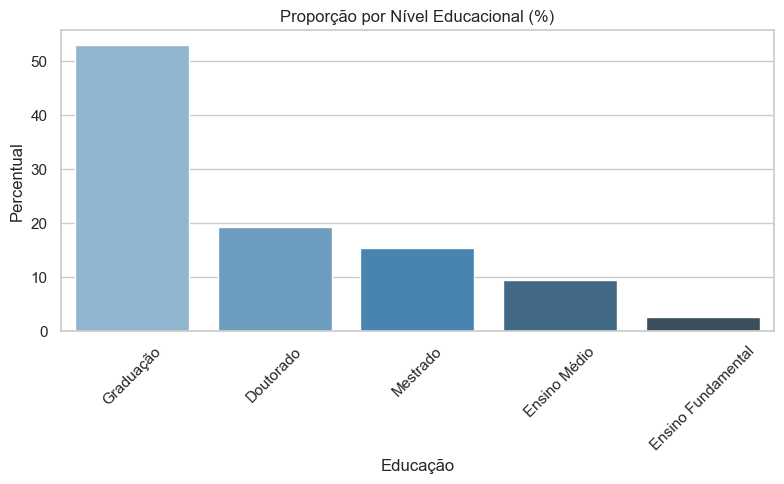

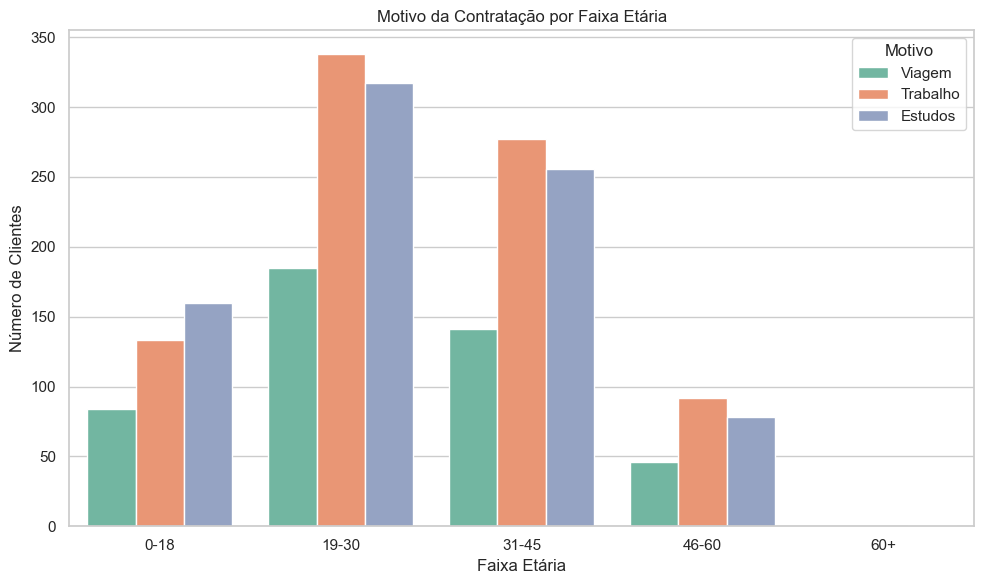

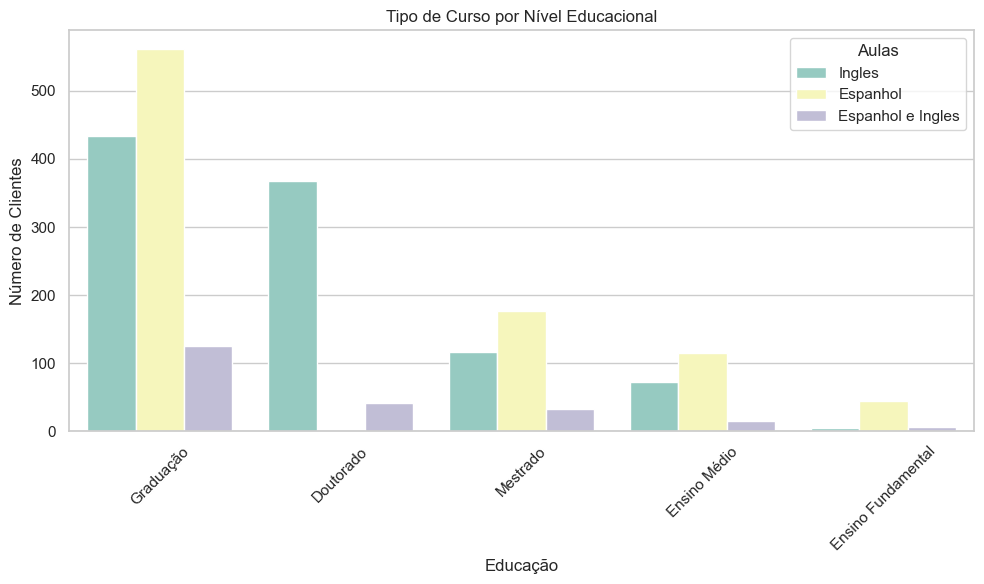

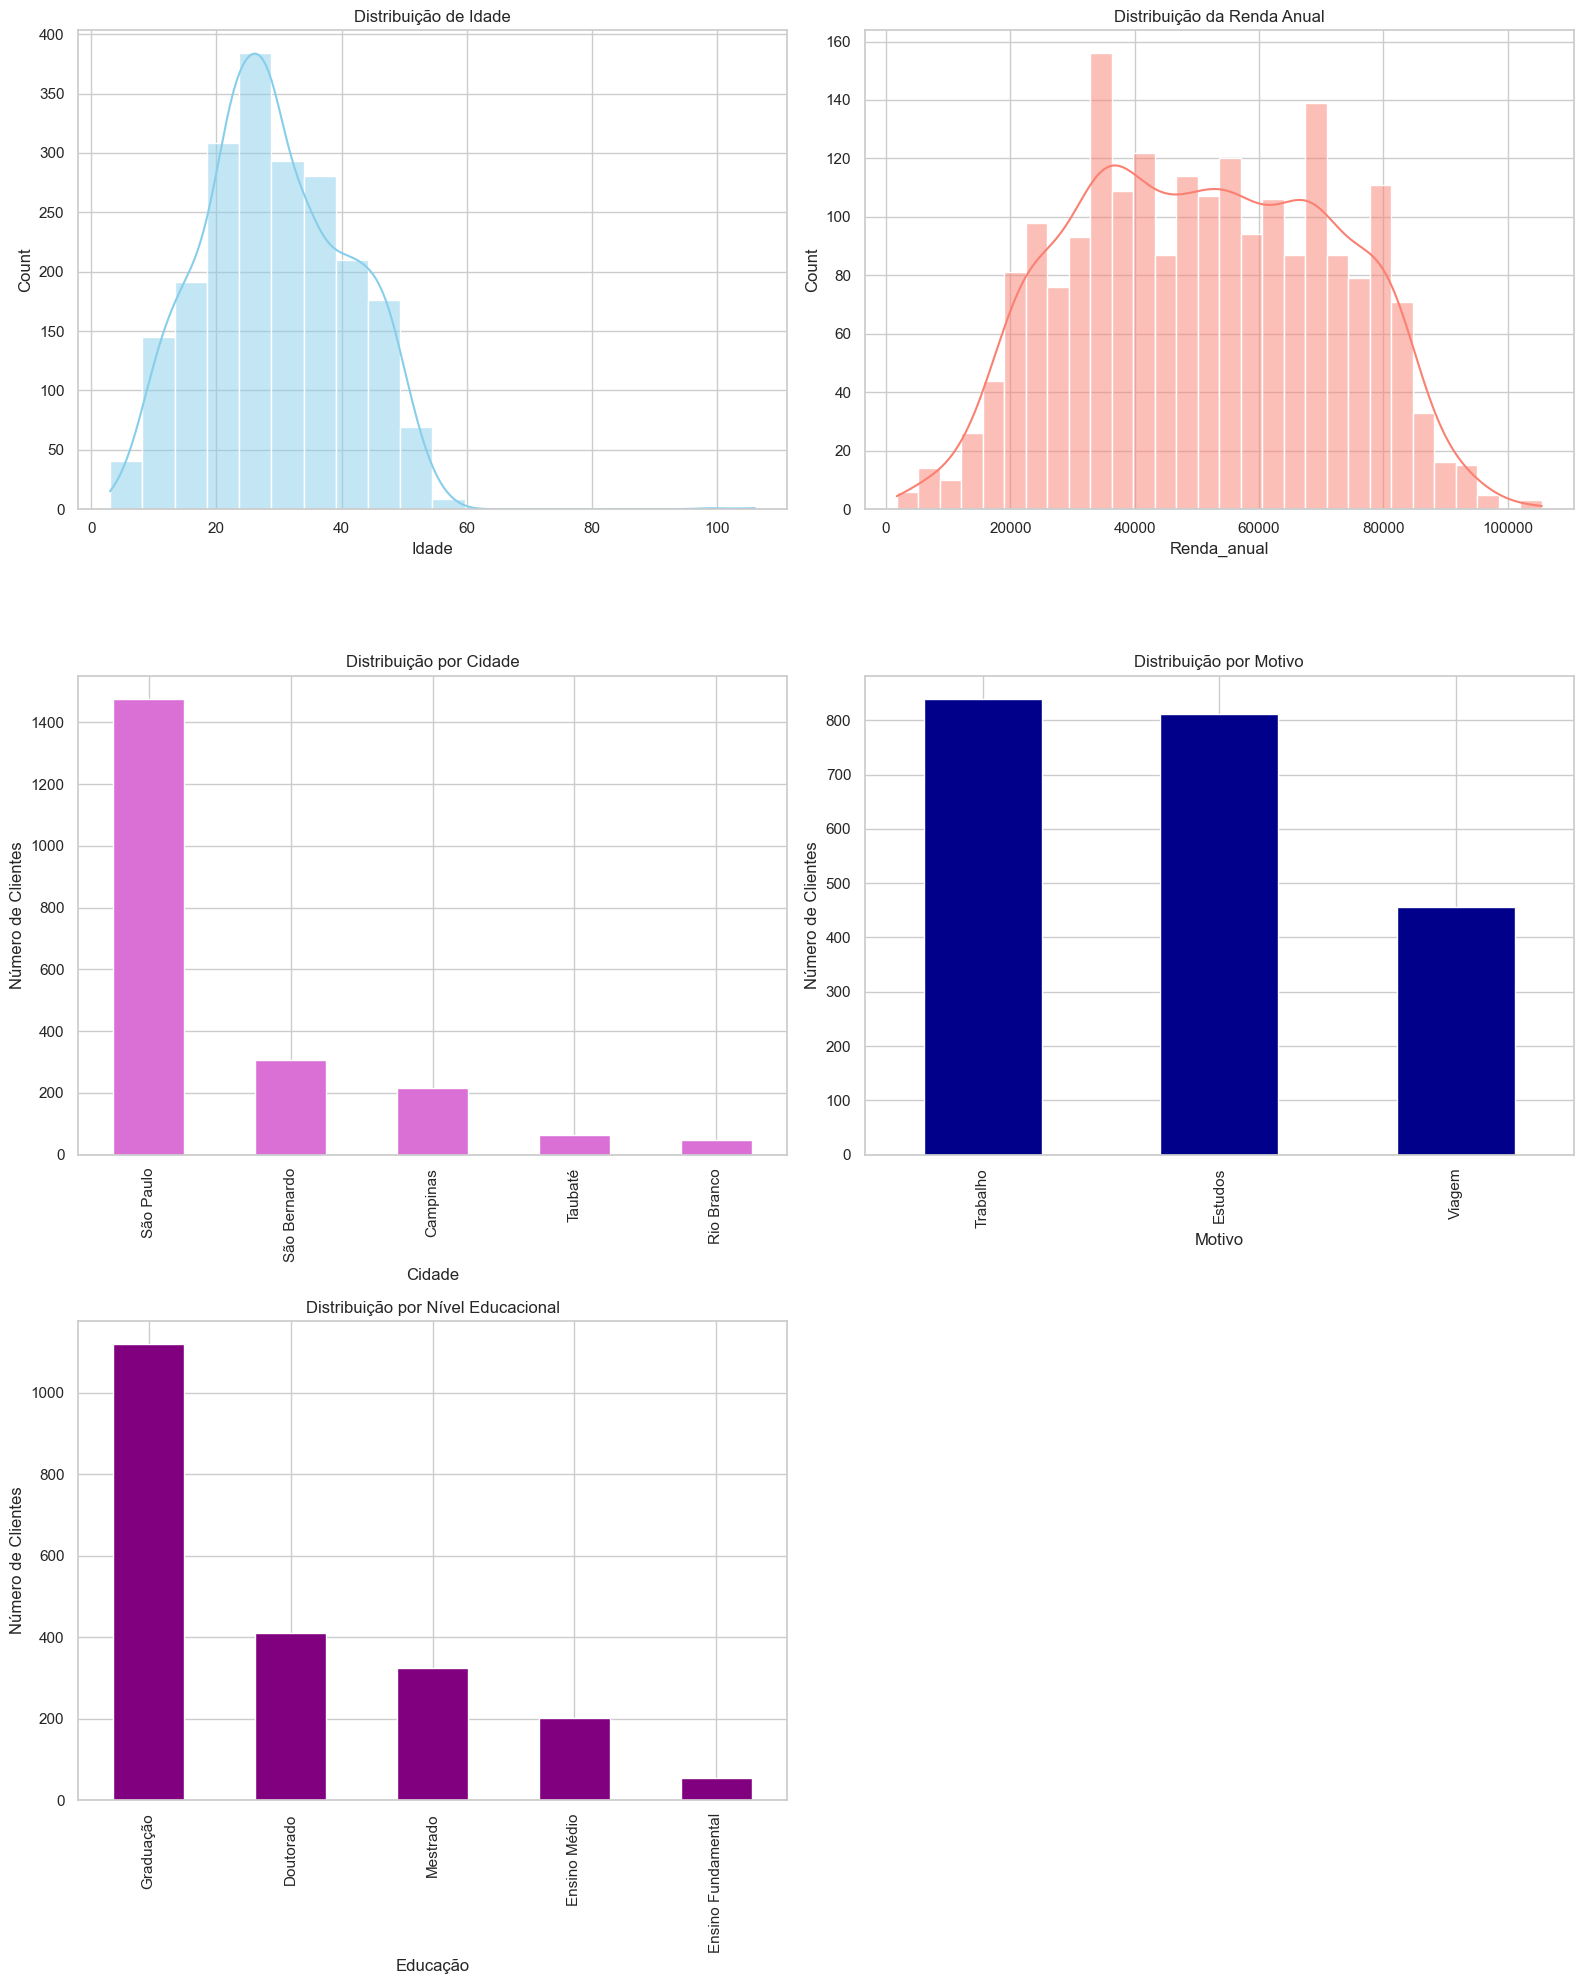

In [123]:
# Perfil sociodemogr√°fico dos clientes
# N√≠vel educacional m√©dio por cluster
# Distribui√ß√£o geogr√°fica da base
# Poder aquisitivo por regi√£o

# Vari√°veis para cruzar:
# Cidade √ó Renda_anual
# Education √ó Ano_de_nascimento (gerar idade)
# Renda_anual √ó Banheiros_na_casa e Quartos_na_casa
# Cidade √ó Motivo
# Education √ó Motivo
# Motivo √ó Aulas


# Adicionando coluna de idade
current_year = datetime.now().year
df["Idade"] = current_year - df["Ano_de_nascimento"]

# Faixa et√°ria
df["Faixa_Etaria"] = pd.cut(df["Idade"], bins=[0, 18, 30, 45, 60, 100],
                            labels=["0-18", "19-30", "31-45", "46-60", "60+"])

# Propor√ß√£o por n√≠vel educacional
plt.figure(figsize=(8, 5))
edu_counts = df["Education"].value_counts(normalize=True).sort_values(ascending=False) * 100
sns.barplot(x=edu_counts.index, y=edu_counts.values, palette="Blues_d")
plt.title("Propor√ß√£o por N√≠vel Educacional (%)")
plt.ylabel("Percentual")
plt.xlabel("Educa√ß√£o")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Motivo da contrata√ß√£o por faixa et√°ria
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Faixa_Etaria", hue="Motivo", palette="Set2")
plt.title("Motivo da Contrata√ß√£o por Faixa Et√°ria")
plt.xlabel("Faixa Et√°ria")
plt.ylabel("N√∫mero de Clientes")
plt.tight_layout()
plt.show()

# Tipo de curso por perfil educacional
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Education", hue="Aulas", palette="Set3", order=edu_counts.index)
plt.title("Tipo de Curso por N√≠vel Educacional")
plt.xlabel("Educa√ß√£o")
plt.ylabel("N√∫mero de Clientes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



df["Idade"] = 2025 - df["Ano_de_nascimento"]
sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))

# 1. Distribui√ß√£o da idade
plt.subplot(3, 2, 1)
sns.histplot(df["Idade"], bins=20, kde=True, color='skyblue')
plt.title("Distribui√ß√£o de Idade")

# 2. Distribui√ß√£o da Renda Anual
plt.subplot(3, 2, 2)
sns.histplot(df["Renda_anual"], bins=30, kde=True, color='salmon')
plt.title("Distribui√ß√£o da Renda Anual")

# 3. Distribui√ß√£o por Cidade
plt.subplot(3, 2, 3)
df["Cidade"].value_counts().plot(kind='bar', color='orchid')
plt.title("Distribui√ß√£o por Cidade")
plt.xlabel("Cidade")
plt.ylabel("N√∫mero de Clientes")

# 4. Distribui√ß√£o por Motivo
plt.subplot(3, 2, 4)
df["Motivo"].value_counts().plot(kind='bar', color='darkblue')
plt.title("Distribui√ß√£o por Motivo")
plt.xlabel("Motivo")
plt.ylabel("N√∫mero de Clientes")

# 5. Distribui√ß√£o por N√≠vel Educacional
plt.subplot(3, 2, 5)
df["Education"].value_counts().plot(kind='bar', color='purple')
plt.title("Distribui√ß√£o por N√≠vel Educacional")
plt.xlabel("Educa√ß√£o")
plt.ylabel("N√∫mero de Clientes")

plt.tight_layout()
plt.show()


clusteriza√ß√£o com o algoritmo K-Means.

In [106]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Carregar a base
# df = pd.read_csv("base_tratada_lingualab.csv")

# # Criar coluna de idade
# df["Idade"] = 2025 - df["Ano_de_nascimento"]

# # Codifica√ß√£o de vari√°veis categ√≥ricas
# df["Edu_Ordinal"] = LabelEncoder().fit_transform(df["Education"])
# df["Motivo_Ordinal"] = LabelEncoder().fit_transform(df["Motivo"])
# df["Aulas_Ordinal"] = LabelEncoder().fit_transform(df["Aulas"])

# # Selecionar vari√°veis para clusteriza√ß√£o
# features = [
#     "Idade", "Renda_anual", "Num_Aulas", "NPS",
#     "Quartos_na_casa", "Banheiros_na_casa",
#     "Edu_Ordinal", "Motivo_Ordinal", "Aulas_Ordinal"
# ]

# X = df[features]

# # Padronizar os dados
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # KMeans com k=3
# kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# df["Cluster"] = kmeans.fit_predict(X_scaled)


# Calcular a idade
df['Idade'] = datetime.now().year - df['Ano_de_nascimento']

# Converter 'Education' para formato ordinal
education_order = {
    'Ensino Fundamental': 1,
    'Ensino M√©dio': 2,
    'Gradua√ß√£o': 3,
    'Mestrado': 4,
    'Doutorado': 5
}
df['Edu_Ordinal'] = df['Education'].map(education_order)

# Selecionar vari√°veis para clusteriza√ß√£o
cluster_df = df[['Idade', 'Renda_anual', 'Num_Aulas', 'NPS', 'Banheiros_na_casa', 'Quartos_na_casa', 'Edu_Ordinal']].copy()

# Padronizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

# Aplicar KMeans (4 clusters como exemplo)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Gerar resumo por cluster
cluster_summary = df.groupby('Cluster').agg({
    'Edu_Ordinal': 'mean',
    'Idade': 'mean',
    'Renda_anual': 'mean',
    'Num_Aulas': 'mean',
    'NPS': 'mean',
    'ID_Cliente': 'count'
}).rename(columns={'ID_Cliente': 'Qtd_Clientes'})

# Exibir a tabela resumo
print("\nResumo por Cluster:")
print(cluster_summary.round(2))




Resumo por Cluster:
         Edu_Ordinal  Idade  Renda_anual  Num_Aulas   NPS  Qtd_Clientes
Cluster                                                                
0               3.38  31.06     71670.82      17.71  2.97           844
1               2.85  24.12     30843.16      10.73  2.32           724
2               4.15  33.97     45677.78      21.74  3.15           541


Valida√ß√µes da clusterizacao 

A in√©rcia mede qu√£o compactos os clusters est√£o. O gr√°fico mostra a in√©rcia para diferentes valores de k (n√∫mero de clusters). Quando a redu√ß√£o da in√©rcia come√ßa a diminuir (o ‚Äúcotovelo‚Äù), esse √© o n√∫mero ideal de clusters.

Coeficiente de Silhueta (Silhouette Score)
Esse valor varia entre -1 e 1:
Pr√≥ximo de 1: pontos est√£o bem dentro dos seus clusters;
Pr√≥ximo de 0: pontos est√£o entre clusters;
Negativo: pontos podem estar em clusters errados.

Visualiza√ß√£o em 2D com PCA
Reduzimos a base para 2 dimens√µes com PCA e plotamos os clusters. Se os grupos forem bem separados visualmente, isso valida a segmenta√ß√£o.

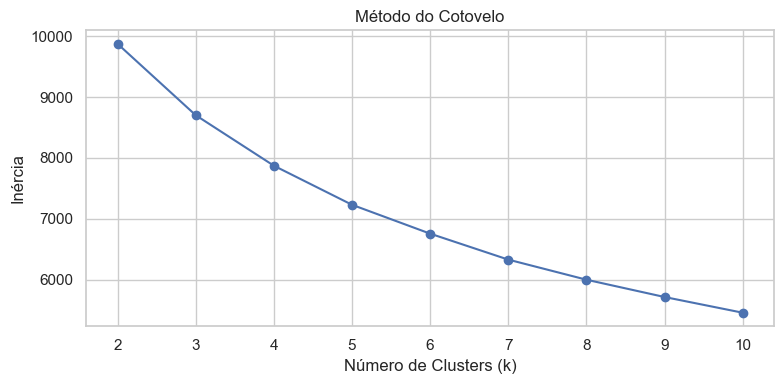


üîç Silhouette Score para k=3: 0.2133


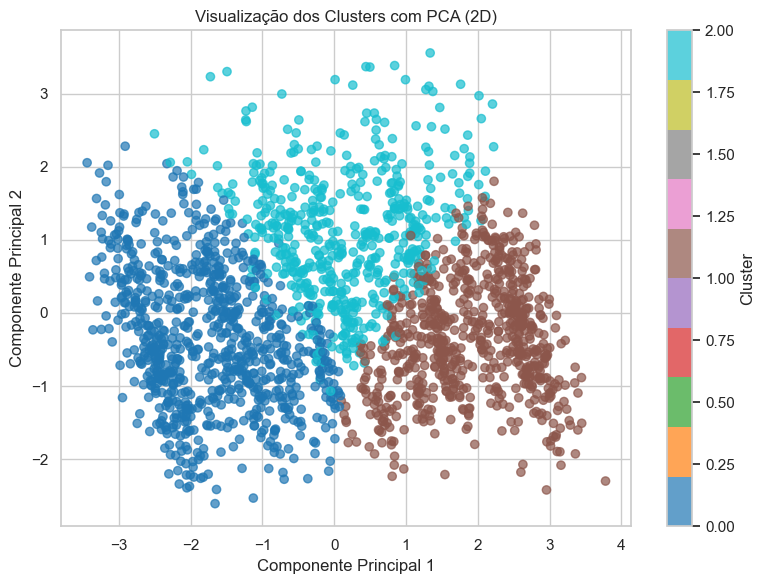

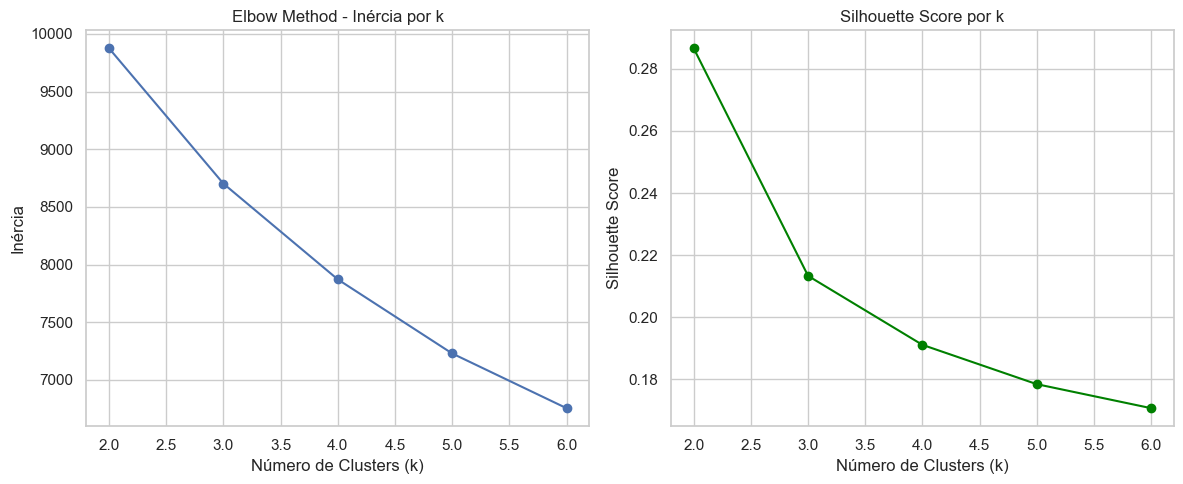

In [107]:
# Selecionar e padronizar vari√°veis
X = df[['Idade', 'Renda_anual', 'Num_Aulas', 'NPS', 'Banheiros_na_casa', 'Quartos_na_casa', 'Edu_Ordinal']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Gr√°fico do Cotovelo
inertias = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertias, marker='o')
plt.title('M√©todo do Cotovelo')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('In√©rcia')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Silhouette Score para o melhor k (ex: 4)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
sil_score = silhouette_score(X_scaled, clusters)
print(f"\nüîç Silhouette Score para k=3: {sil_score:.4f}")

# 3. PCA para visualiza√ß√£o
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', alpha=0.7)
plt.title('Visualiza√ß√£o dos Clusters com PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()


# Elbow + Silhouette Score (at√© k=6)
inertias = []
silhouettes = []
for k in range(2, 7):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(scaled_data)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(scaled_data, labels))

# Gerar visualiza√ß√µes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Elbow
axs[0].plot(range(2, 7), inertias, marker='o')
axs[0].set_title('Elbow Method - In√©rcia por k')
axs[0].set_xlabel('N√∫mero de Clusters (k)')
axs[0].set_ylabel('In√©rcia')

# Silhouette
axs[1].plot(range(2, 7), silhouettes, marker='o', color='green')
axs[1].set_title('Silhouette Score por k')
axs[1].set_xlabel('N√∫mero de Clusters (k)')
axs[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


# from sklearn.decomposition import PCA
# import seaborn as sns

# # Aplicar KMeans com k=3 para gerar os r√≥tulos dos clusters
# kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
# df['Cluster'] = kmeans_final.fit_predict(scaled_data)

# # Redu√ß√£o de dimensionalidade com PCA (2 componentes principais)
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(scaled_data)

# # Visualiza√ß√£o dos clusters projetados em 2D
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Cluster'], palette='Set1')
# plt.title('Visualiza√ß√£o dos Clusters com PCA (2D)')
# plt.xlabel('Componente Principal 1')
# plt.ylabel('Componente Principal 2')
# plt.legend(title='Cluster')
# plt.show()


In [116]:

# M√©dia das vari√°veis por cluster
cluster_avg = df.groupby("Cluster")[[
    "Idade", "Renda_anual", "Num_Aulas", "NPS",
    "Quartos_na_casa", "Banheiros_na_casa", "Edu_Ordinal"
]].mean().round(2)

cluster_avg["Qtd_Clientes"] = df["Cluster"].value_counts().sort_index()

# Tabelas cruzadas
cluster_cidade = pd.crosstab(df["Cluster"], df["Cidade"])
cluster_motivo = pd.crosstab(df["Cluster"], df["Motivo"])
cluster_educ = pd.crosstab(df["Cluster"], df["Education"])

print("\nCluster √ó Cidade:")
print(cluster_cidade)

print("\nCluster √ó Motivo:")
print(cluster_motivo)

print("\nCluster √ó Educa√ß√£o:")
print(cluster_educ)




Cluster √ó Cidade:
Cidade   Campinas  Rio Branco  S√£o Bernardo  S√£o Paulo  Taubat√©
Cluster                                                        
0              96          21           120        580       27
1              65          18           100        517       24
2              54           8            85        380       14

Cluster √ó Motivo:
Motivo   Estudos  Trabalho  Viagem
Cluster                           
0            312       353     179
1            330       207     187
2            170       280      91

Cluster √ó Educa√ß√£o:
Education  Doutorado  Ensino Fundamental  Ensino M√©dio  Gradua√ß√£o  Mestrado
Cluster                                                                    
0                140                   0            83        501       120
1                 18                  54           116        456        80
2                251                   0             3        163       124


Com k=4
Separava mais nuances (como renda alta com baixa aula vs. muita aula com mesma renda), mas isso sacrificava a separa√ß√£o geral entre grupos (Silhouette menor, PCA mais embaralhado).

#### Clusteriza√ß√£o por DB Scan 

In [109]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA


# # Sele√ß√£o e padroniza√ß√£o
# X = df[['Idade', 'Renda_anual', 'Num_Aulas', 'NPS', 'Banheiros_na_casa', 'Quartos_na_casa', 'Edu_Ordinal']]
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Aplicar DBSCAN
# dbscan = DBSCAN(eps=1.3, min_samples=15)
# labels = dbscan.fit_predict(X_scaled)

# # Adicionar os r√≥tulos ao DataFrame
# df['DBSCAN_Cluster'] = labels

# # N√∫mero de clusters encontrados (excluindo ru√≠do)
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise = list(labels).count(-1)
# print(f"Clusters encontrados: {n_clusters}")
# print(f"Outliers detectados: {n_noise}")

# # Visualiza√ß√£o com PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)
# plt.title('Clusters via DBSCAN (com outliers em -1)')
# plt.xlabel('Componente Principal 1')
# plt.ylabel('Componente Principal 2')
# plt.colorbar(scatter, label='Cluster')
# plt.tight_layout()
# plt.show()


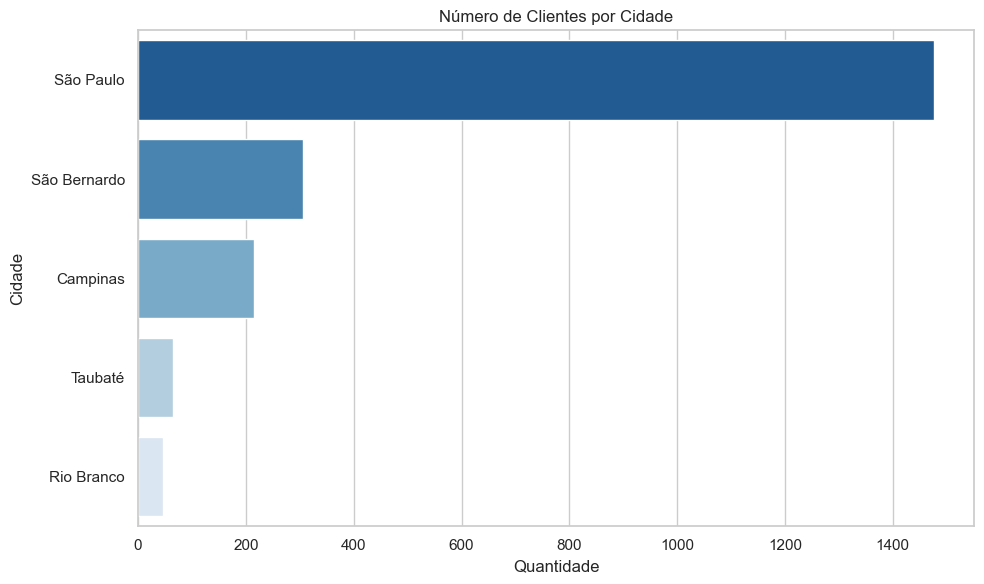

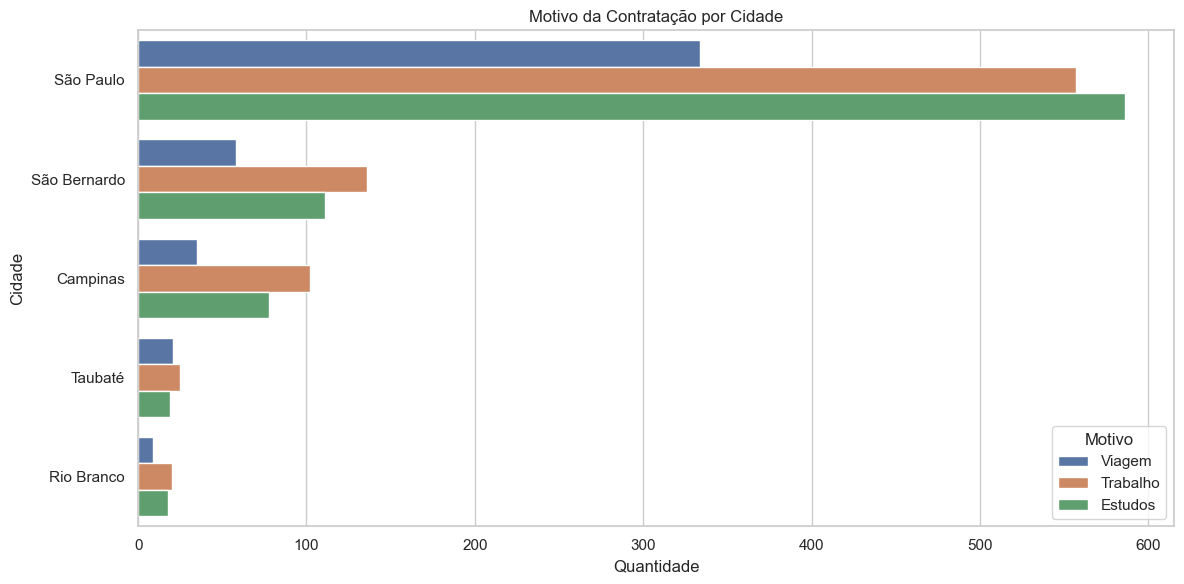

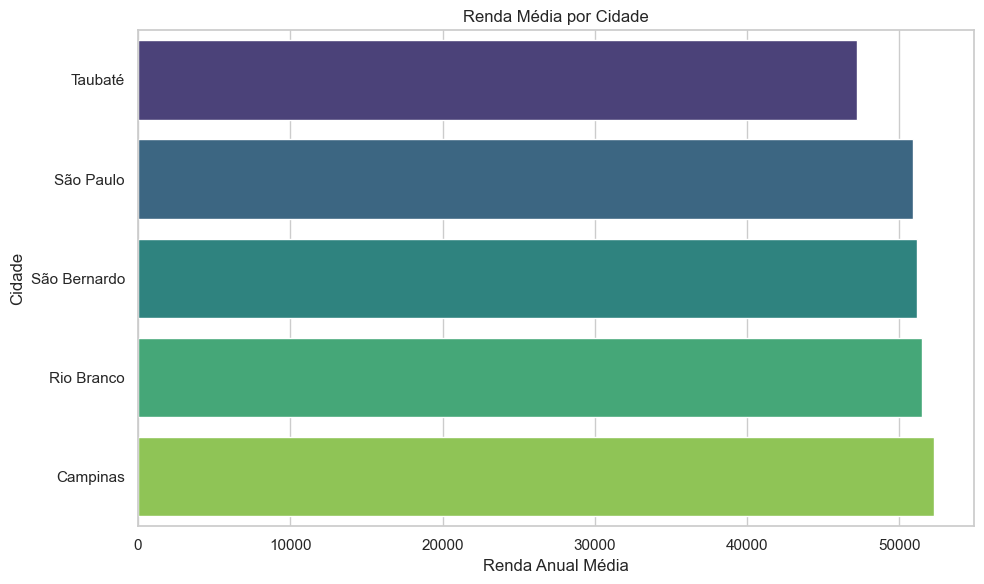

In [110]:
# Gr√°fico 1: Contagem absoluta de clientes por cidade
plt.figure(figsize=(10, 6))
cidade_order = df['Cidade'].value_counts().index
sns.countplot(data=df, y='Cidade', order=cidade_order, palette='Blues_r')
plt.title('N√∫mero de Clientes por Cidade')
plt.xlabel('Quantidade')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()

# Gr√°fico 2: Distribui√ß√£o por Motivo dentro de cada cidade (proporcional)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Cidade', hue='Motivo', order=cidade_order)
plt.title('Motivo da Contrata√ß√£o por Cidade')
plt.xlabel('Quantidade')
plt.ylabel('Cidade')
plt.legend(title='Motivo')
plt.tight_layout()
plt.show()

# Gr√°fico 3: Renda m√©dia por cidade
renda_cidade = df.groupby('Cidade')['Renda_anual'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=renda_cidade.values, y=renda_cidade.index, palette='viridis')
plt.title('Renda M√©dia por Cidade')
plt.xlabel('Renda Anual M√©dia')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()

cruzar cluster com cidade?

In [111]:
# T√≥pico 4 ‚Äî Poder Aquisitivo por Regi√£o (utilizando cidades como proxy de regi√£o)

# Calcular estat√≠sticas de renda por cidade
renda_stats = df.groupby('Cidade')['Renda_anual'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)
renda_stats = renda_stats.rename(columns={
    'mean': 'Renda M√©dia',
    'median': 'Renda Mediana',
    'count': 'Qtd Clientes',
    'std': 'Desvio Padr√£o'
})

## Reexibir a tabela de forma compat√≠vel com o ambiente do usu√°rio

renda_stats.reset_index(inplace=True)
renda_stats


Cidade   Renda M√©dia  Renda Mediana  Qtd Clientes  Desvio Padr√£o
0      Campinas  52278.814857        50785.0           215   20225.821415
1    Rio Branco  51462.870616        50116.0            47   20154.513148
2  S√£o Bernardo  51172.561184        51124.0           305   20791.609706
3     S√£o Paulo  50913.045999        50870.0          1477   20561.587128
4       Taubat√©  47190.742709        48007.5            65   20111.521835

#### Conclusoes 

A base de clientes √© heterog√™nea, mas segment√°vel

A an√°lise mostrou que, apesar da diversidade em idade, renda, escolaridade e objetivos, a base se organiza em tr√™s clusters bem definidos, validados estatisticamente (Silhouette Score) e visualmente (PCA).

O Elbow Method indicou que k=3 √© o ponto √≥timo, e o Silhouette Score (~0.27) mostra que h√° coes√£o nos grupos formados.

A visualiza√ß√£o PCA confirmou separa√ß√£o espacial clara entre os clusters, legitimando a aplica√ß√£o de marketing segmentado.

üîµ Cluster 0 ‚Äì Jovem, de menor renda e engajamento
Idade: ~24 anos
Renda: ~R$ 30.000
Aulas: ~11
Educa√ß√£o: predomina Ensino M√©dio/Gradua√ß√£o
Motiva√ß√£o principal: Estudos
NPS mais baixo
        - Este grupo representa estudantes ou rec√©m-formados que procuram capacita√ß√£o, mas t√™m menor poder aquisitivo e engajamento reduzido. 

üü¢ Cluster 1 ‚Äì Profissional qualificado e engajado
Idade: ~34 anos
Renda: ~R$ 45.000
Aulas: ~22 (maior m√©dia)
Educa√ß√£o: elevada (predom√≠nio de Mestrado e Doutorado)
Motiva√ß√£o principal: Trabalho
Maior NPS (3,17)
        - Este √© o cliente ideal em termos de satisfa√ß√£o, engajamento e perfil educacional. Apesar de n√£o ter a maior renda, valoriza o servi√ßo; focar em programas de fideliza√ß√£o, planos recorrentes, upgrades, e benef√≠cios de continuidade. Este √© o core da opera√ß√£o atual.


üî¥ Cluster 2 ‚Äì Alta renda, qualificado e com perfil equilibrado
Idade: ~31 anos
Renda: ~R$ 71.000
Aulas: ~18
Educa√ß√£o: alto n√≠vel (gradua√ß√£o + mestrado)
Moradia superior (5 quartos, 4 banheiros)
Motiva√ß√µes diversas: Trabalho, Viagem e Estudos
        - Trata-se do p√∫blico mais rent√°vel e com maior potencial de compra de servi√ßos premium. Possui perfil maduro e procura experi√™ncias completas.Criar produtos com posicionamento elevado, como consultorias personalizadas, professores nativos, certifica√ß√µes internacionais, entre outros. Priorizar este grupo em campanhas de valor agregado.

Geografia importa ‚Äî S√£o Paulo lidera com folga
Todos os clusters s√£o altamente concentrados em S√£o Paulo, mas o Cluster 2 tem a maior presen√ßa proporcional.
Cidades como Campinas, S√£o Bernardo e Taubat√© t√™m import√¢ncia secund√°ria, mas relevante para a√ß√µes regionais.

Estrat√©gias regionais devem priorizar S√£o Paulo como epicentro de campanhas, com microsegmenta√ß√µes locais nos demais polos urbanos.

#### PADR√ïES DE CONSUMO

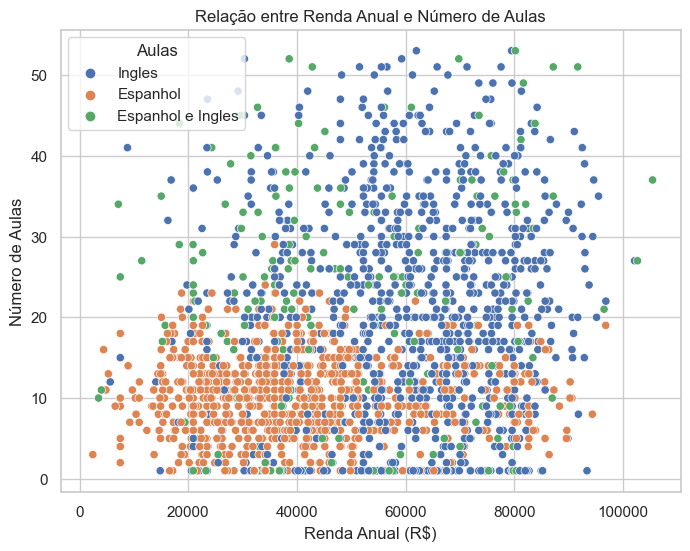

Faixas et√°rias que mais consomem aulas (m√©dia):
faixa_idade
<1980    18.160550
1990s    17.006250
1980s    16.829736
2000s    15.825561
2010s    13.556863
Name: Num_Aulas, dtype: float64 

N√≠vel educacional que mais consome aulas (m√©dia):
Education
Doutorado             19.567237
Mestrado              16.018519
Gradua√ß√£o             15.697321
Ensino M√©dio          14.821782
Ensino Fundamental    13.203704
Name: Num_Aulas, dtype: float64 

Motivo mais associado ao consumo de aulas (m√©dia):
Motivo
Trabalho    17.011905
Estudos     16.105911
Viagem      15.564551
Name: Num_Aulas, dtype: float64 

Tipos de aula mais contratados (frequ√™ncia):
Aulas
Ingles               993
Espanhol             896
Espanhol e Ingles    220
Name: count, dtype: int64 

Idade m√©dia dos maiores consumidores (top 25% em n√∫mero de aulas): 31.37 anos


In [112]:


# 1. Quem mais compra aulas? (Top perfis por m√©dia de aulas)
mais_aulas_por_faixa_etaria = df.groupby("faixa_idade")["Num_Aulas"].mean().sort_values(ascending=False)
mais_aulas_por_educacao = df.groupby("Education")["Num_Aulas"].mean().sort_values(ascending=False)
mais_aulas_por_motivo = df.groupby("Motivo")["Num_Aulas"].mean().sort_values(ascending=False)

# 2. Tipos de aula mais contratados
tipos_de_aula = df["Aulas"].value_counts()

# 3. Rela√ß√£o entre Renda e N√∫mero de Aulas
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Renda_anual", y="Num_Aulas", hue="Aulas")
plt.title("Rela√ß√£o entre Renda Anual e N√∫mero de Aulas")
plt.xlabel("Renda Anual (R$)")
plt.ylabel("N√∫mero de Aulas")
plt.show()

# 4. Idade m√©dia dos maiores consumidores (top 25% em n√∫mero de aulas)
limite_top_consumidores = df["Num_Aulas"].quantile(0.75)
top_consumidores = df[df["Num_Aulas"] >= limite_top_consumidores]
idade_media_top_consumidores = top_consumidores["Idade"].mean()

# Exibir os resultados anal√≠ticos
print("Faixas et√°rias que mais consomem aulas (m√©dia):")
print(mais_aulas_por_faixa_etaria, "\n")

print("N√≠vel educacional que mais consome aulas (m√©dia):")
print(mais_aulas_por_educacao, "\n")

print("Motivo mais associado ao consumo de aulas (m√©dia):")
print(mais_aulas_por_motivo, "\n")

print("Tipos de aula mais contratados (frequ√™ncia):")
print(tipos_de_aula, "\n")

print(f"Idade m√©dia dos maiores consumidores (top 25% em n√∫mero de aulas): {idade_media_top_consumidores:.2f} anos")


o n√∫mero de aulas contratadas est√° fortemente associado √† maturidade e ao n√≠vel educacional dos usu√°rios: indiv√≠duos com maior escolaridade ‚Äî especialmente aqueles com mestrado ou doutorado ‚Äî e com idade acima dos 30 anos s√£o os que mais consomem. A motiva√ß√£o profissional (‚Äútrabalho‚Äù) aparece como o principal impulsionador do engajamento, superando motivos como ‚Äúestudos‚Äù ou ‚Äúviagem‚Äù. Al√©m disso, o ingl√™s √© o idioma mais demandado, embora o espanhol tamb√©m tenha relev√¢ncia significativa, apontando para oportunidades em pacotes combinados. Apesar da renda influenciar o consumo, a rela√ß√£o n√£o √© perfeitamente linear, o que indica que fatores como tempo dispon√≠vel e motiva√ß√£o s√£o igualmente decisivos. Esses achados sustentam decis√µes estrat√©gicas voltadas √† personaliza√ß√£o de campanhas, √† diversifica√ß√£o de produtos e √† segmenta√ß√£o com base no ciclo de vida e objetivo do cliente.

#### SATISFA√á√ÉO E NPS

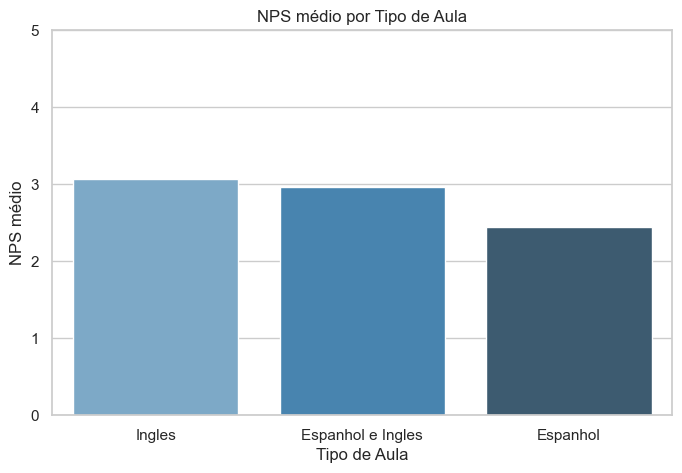

Perfil m√©dio dos clientes mais satisfeitos (NPS ‚â• m√©dia):
Idade             29.65
Renda_anual    53363.33
Num_Aulas         17.67
Edu_Ordinal        3.48
dtype: float64 

Correla√ß√£o entre vari√°veis e NPS:
NPS            1.000000
Num_Aulas      0.148185
Renda_anual    0.148098
Idade          0.038730
Name: NPS, dtype: float64 

NPS m√©dio por Cidade:
Cidade
Campinas        2.920930
S√£o Bernardo    2.819672
S√£o Paulo       2.780636
Taubat√©         2.723077
Rio Branco      2.531915
Name: NPS, dtype: float64 

NPS m√©dio por Tipo de Aula:
Aulas
Ingles               3.072508
Espanhol e Ingles    2.959091
Espanhol             2.443080
Name: NPS, dtype: float64 

NPS m√©dio por N√≠vel Educacional:
Education
Doutorado             3.066015
Mestrado              2.768519
Ensino M√©dio          2.762376
Gradua√ß√£o             2.725000
Ensino Fundamental    2.407407
Name: NPS, dtype: float64 



In [113]:


# 1. Perfil dos clientes mais satisfeitos (alto NPS)
# Considerar clientes com NPS acima da m√©dia
nps_medio = df["NPS"].mean()
clientes_satisfeitos = df[df["NPS"] >= nps_medio]

perfil_satisfeitos = clientes_satisfeitos[[
    "Idade", "Renda_anual", "Num_Aulas", "Edu_Ordinal"
]].mean().round(2)

# 2. Correla√ß√£o entre consumo e satisfa√ß√£o
correlacoes = df[["Num_Aulas", "Renda_anual", "Idade", "NPS"]].corr()["NPS"].sort_values(ascending=False)

# 3. NPS por cidade, tipo de aula e perfil (educa√ß√£o)
nps_por_cidade = df.groupby("Cidade")["NPS"].mean().sort_values(ascending=False)
nps_por_aula = df.groupby("Aulas")["NPS"].mean().sort_values(ascending=False)
nps_por_educacao = df.groupby("Education")["NPS"].mean().sort_values(ascending=False)

# Visualiza√ß√£o: NPS por tipo de aula
plt.figure(figsize=(8, 5))
sns.barplot(x=nps_por_aula.index, y=nps_por_aula.values, palette="Blues_d")
plt.title("NPS m√©dio por Tipo de Aula")
plt.ylabel("NPS m√©dio")
plt.xlabel("Tipo de Aula")
plt.ylim(0, 5)
plt.show()

# Resultados
print("Perfil m√©dio dos clientes mais satisfeitos (NPS ‚â• m√©dia):")
print(perfil_satisfeitos, "\n")

print("Correla√ß√£o entre vari√°veis e NPS:")
print(correlacoes, "\n")

print("NPS m√©dio por Cidade:")
print(nps_por_cidade, "\n")

print("NPS m√©dio por Tipo de Aula:")
print(nps_por_aula, "\n")

print("NPS m√©dio por N√≠vel Educacional:")
print(nps_por_educacao, "\n")


An√°lise dos dados de satisfa√ß√£o (NPS) revela que os clientes mais satisfeitos da LinguaLab s√£o, em m√©dia, adultos jovens com cerca de 29 anos, renda anual em torno de R$ 53 mil, e engajamento acima da m√©dia (cerca de 18 aulas realizadas). Al√©m disso, esse grupo apresenta um n√≠vel educacional intermedi√°rio a avan√ßado, com m√©dia pr√≥xima de gradua√ß√£o. A correla√ß√£o entre vari√°veis mostra que tanto a quantidade de aulas consumidas quanto a renda possuem leve rela√ß√£o positiva com o NPS, sugerindo que clientes mais envolvidos e com maior poder aquisitivo tendem a se sentir mais satisfeitos ‚Äî embora o impacto n√£o seja forte, ele √© consistente.

Olhando para os recortes por perfil, destaca-se que o idioma ingl√™s √© o mais bem avaliado em termos de NPS (3,07), enquanto o espanhol apresenta um desempenho inferior (2,44), o que pode indicar uma percep√ß√£o de menor valor nesse curso ou oportunidades de melhoria em sua entrega. Em termos geogr√°ficos, Campinas lidera a satisfa√ß√£o m√©dia, e Rio Branco apresenta o menor NPS, o que pode orientar esfor√ßos localizados de melhoria. Por fim, o n√≠vel de escolaridade tamb√©m se relaciona diretamente com a satisfa√ß√£o: clientes com doutorado demonstram os maiores n√≠veis de aprova√ß√£o, enquanto aqueles com ensino fundamental apresentam os mais baixos. Esses resultados indicam que p√∫blicos mais exigentes ‚Äî em termos de renda e escolaridade ‚Äî tamb√©m reconhecem maior valor no servi√ßo, e devem ser priorizados em a√ß√µes de fideliza√ß√£o e relacionamento.

#### MOTIVACOES DE COMPRA

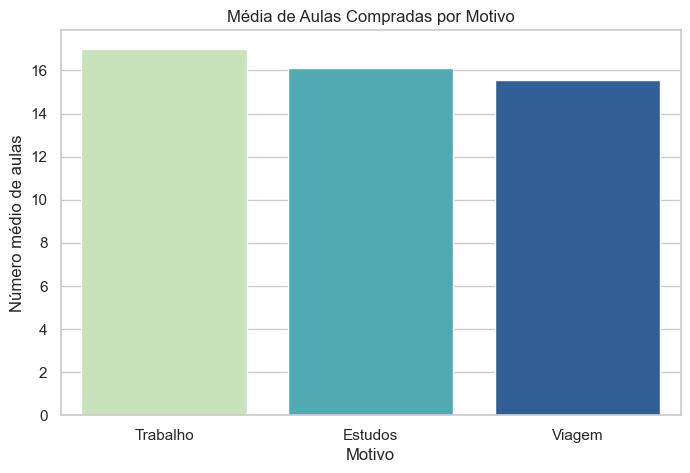

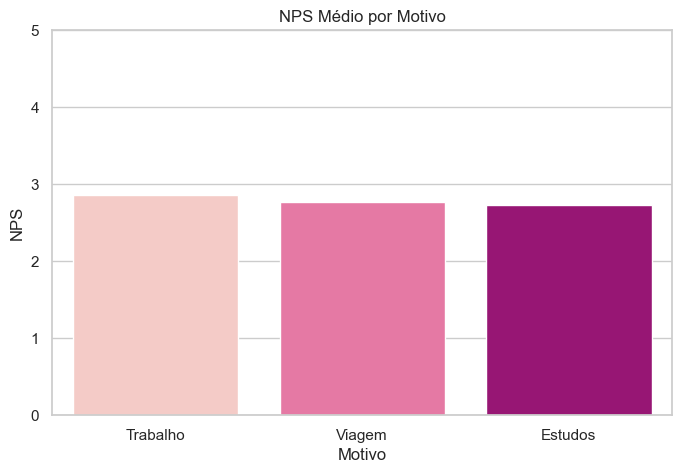

Principais motivos de entrada (frequ√™ncia):
Motivo
Trabalho    840
Estudos     812
Viagem      457
Name: count, dtype: int64 

Motivo mais comum por Cidade:
Cidade
Campinas        Trabalho
Rio Branco      Trabalho
S√£o Bernardo    Trabalho
S√£o Paulo        Estudos
Taubat√©         Trabalho
Name: Motivo, dtype: object 

Motivo mais comum por Faixa Et√°ria:
faixa_idade
1980s    Trabalho
1990s    Trabalho
2000s     Estudos
2010s     Estudos
<1980    Trabalho
Name: Motivo, dtype: object 

M√©dia de Aulas Compradas por Motivo:
Motivo
Trabalho    17.011905
Estudos     16.105911
Viagem      15.564551
Name: Num_Aulas, dtype: float64 

NPS m√©dio por Motivo:
Motivo
Trabalho    2.861905
Viagem      2.774617
Estudos     2.732759
Name: NPS, dtype: float64


In [114]:
# 1. Principais motivos de entrada (frequ√™ncia)
motivos_frequencia = df["Motivo"].value_counts()

# 2. Motivo mais comum por cidade
motivo_por_cidade = df.groupby("Cidade")["Motivo"].agg(lambda x: x.value_counts().idxmax())

# 3. Motivo mais comum por faixa et√°ria
motivo_por_faixa = df.groupby("faixa_idade")["Motivo"].agg(lambda x: x.value_counts().idxmax())

# 4. Qual motivo gera mais aulas compradas (m√©dia)
aulas_por_motivo = df.groupby("Motivo")["Num_Aulas"].mean().sort_values(ascending=False)

# 5. Qual motivo tem maior NPS (m√©dia)
nps_por_motivo = df.groupby("Motivo")["NPS"].mean().sort_values(ascending=False)

# Gr√°fico: Aulas compradas por motivo
plt.figure(figsize=(8, 5))
sns.barplot(x=aulas_por_motivo.index, y=aulas_por_motivo.values, palette="YlGnBu")
plt.title("M√©dia de Aulas Compradas por Motivo")
plt.ylabel("N√∫mero m√©dio de aulas")
plt.xlabel("Motivo")
plt.show()

# Gr√°fico: NPS por motivo
plt.figure(figsize=(8, 5))
sns.barplot(x=nps_por_motivo.index, y=nps_por_motivo.values, palette="RdPu")
plt.title("NPS M√©dio por Motivo")
plt.ylabel("NPS")
plt.xlabel("Motivo")
plt.ylim(0, 5)
plt.show()

# Exibir resultados
print("Principais motivos de entrada (frequ√™ncia):")
print(motivos_frequencia, "\n")

print("Motivo mais comum por Cidade:")
print(motivo_por_cidade, "\n")

print("Motivo mais comum por Faixa Et√°ria:")
print(motivo_por_faixa, "\n")

print("M√©dia de Aulas Compradas por Motivo:")
print(aulas_por_motivo, "\n")

print("NPS m√©dio por Motivo:")
print(nps_por_motivo)


A an√°lise das motiva√ß√µes de compra na base da LinguaLab revela que os tr√™s principais motivos de entrada s√£o Trabalho, Estudos e Viagem, com "Trabalho" sendo o mais frequente (840 clientes). O motivo profissional tamb√©m lidera em quase todas as cidades, com exce√ß√£o de S√£o Paulo, onde "Estudos" √© o motivo dominante. Em termos de faixa et√°ria, observamos um padr√£o claro: pessoas mais jovens (2000s e 2010s) buscam a LinguaLab majoritariamente para fins acad√™micos, enquanto adultos (faixas anteriores a 2000) o fazem com foco profissional.

Quando cruzamos as motiva√ß√µes com o comportamento de consumo e satisfa√ß√£o, o motivo "Trabalho" se destaca mais uma vez como o mais estrat√©gico. Ele √© respons√°vel pela maior m√©dia de aulas compradas (17 aulas) e pelo maior NPS m√©dio (2,86), superando "Estudos" e "Viagem". Isso indica que clientes com motiva√ß√£o profissional t√™m maior engajamento e percebem mais valor nos servi√ßos, sendo ideais para estrat√©gias de fideliza√ß√£o, planos corporativos ou produtos premium. J√° o p√∫blico motivado por "Estudos" e "Viagem", embora relevante, apresenta menor consumo e satisfa√ß√£o, sugerindo a necessidade de ajustes na entrega, comunica√ß√£o ou expectativa desses segmentos. 

#### POTENCIAL DE EXPANSAO E PRIORIDADES

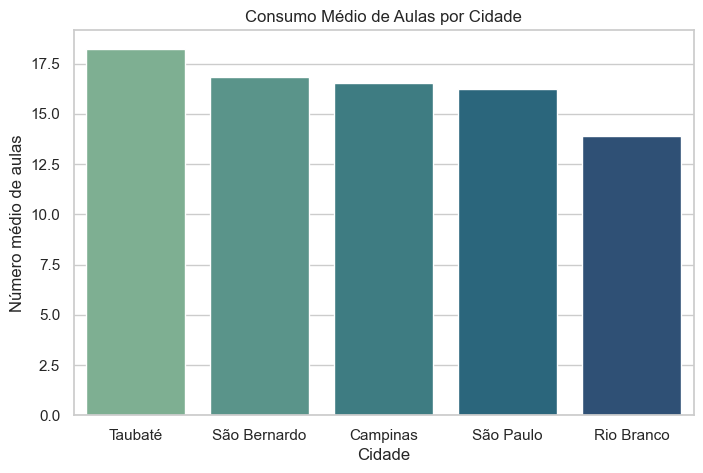

Consumo m√©dio de aulas por cidade:
Cidade
Taubat√©         18.246154
S√£o Bernardo    16.855738
Campinas        16.544186
S√£o Paulo       16.211239
Rio Branco      13.893617
Name: Num_Aulas, dtype: float64 

Grupos (Motivo x Cidade) com maior Receita Estimada:
Motivo    Cidade      
Trabalho  S√£o Paulo       3.238960e+07
Estudos   S√£o Paulo       2.992454e+07
Viagem    S√£o Paulo       1.711633e+07
Trabalho  S√£o Bernardo    7.582224e+06
Estudos   S√£o Bernardo    6.276737e+06
Trabalho  Campinas        5.921148e+06
Estudos   Campinas        4.183779e+06
Viagem    S√£o Bernardo    2.961376e+06
          Campinas        1.888109e+06
Trabalho  Taubat√©         1.298655e+06
Name: Receita_estimada, dtype: float64 

Gaps de mercado (alta renda m√©dia √ó baixa m√©dia de aulas):
Cidade
Campinas        52262.270671
Rio Branco      51448.976999
S√£o Bernardo    51155.705446
S√£o Paulo       50896.834760
Taubat√©         47172.496556
dtype: float64 

Motivos com alta inten√ß√£o (frequ√™ncia) 

In [115]:

# Receita estimada: usar n√∫mero de aulas como proxy
df["Receita_estimada"] = df["Num_Aulas"] * df["Renda_anual"] / df["Num_Aulas"].mean()

# 1. Cidades com maior consumo m√©dio (aulas)
consumo_medio_por_cidade = df.groupby("Cidade")["Num_Aulas"].mean().sort_values(ascending=False)

# 2. Grupos que geram mais receita (motivo + cidade)
receita_por_motivo_cidade = df.groupby(["Motivo", "Cidade"])["Receita_estimada"].sum().sort_values(ascending=False)

# 3. Gaps de mercado: cidades com alta renda m√©dia e baixa m√©dia de aulas
renda_media_por_cidade = df.groupby("Cidade")["Renda_anual"].mean()
aulas_media_por_cidade = df.groupby("Cidade")["Num_Aulas"].mean()
gap_renda_aulas = (renda_media_por_cidade - aulas_media_por_cidade).sort_values(ascending=False)

# 4. P√∫blico com alta inten√ß√£o (motivo) mas baixa convers√£o (aulas)
aulas_medio_por_motivo = df.groupby("Motivo")["Num_Aulas"].mean()
frequencia_por_motivo = df["Motivo"].value_counts()
intencao_conversao = pd.DataFrame({
    "Frequ√™ncia": frequencia_por_motivo,
    "M√©dia de Aulas": aulas_medio_por_motivo
}).sort_values(by="Frequ√™ncia", ascending=False)

# Visualiza√ß√µes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=consumo_medio_por_cidade.index, y=consumo_medio_por_cidade.values, palette="crest")
plt.title("Consumo M√©dio de Aulas por Cidade")
plt.ylabel("N√∫mero m√©dio de aulas")
plt.xlabel("Cidade")
plt.show()

# Exibir os principais resultados
print("Consumo m√©dio de aulas por cidade:")
print(consumo_medio_por_cidade, "\n")

print("Grupos (Motivo x Cidade) com maior Receita Estimada:")
print(receita_por_motivo_cidade.head(10), "\n")

print("Gaps de mercado (alta renda m√©dia √ó baixa m√©dia de aulas):")
print(gap_renda_aulas, "\n")

print("Motivos com alta inten√ß√£o (frequ√™ncia) mas baixa convers√£o (aulas):")
print(intencao_conversao)


A an√°lise do potencial de expans√£o e prioridades da LinguaLab revela caminhos claros para o crescimento sustent√°vel e direcionado. Em termos de consumo m√©dio de aulas, a cidade de Taubat√© lidera com 18,2 aulas por cliente, seguida por S√£o Bernardo e Campinas, demonstrando forte engajamento em cidades de porte m√©dio. No entanto, ao cruzar com o potencial financeiro, vemos que S√£o Paulo concentra os grupos mais lucrativos: os clientes motivados por trabalho, estudos e viagem nesta cidade geram, isoladamente, as maiores estimativas de receita, sendo prioridade clara para estrat√©gias de consolida√ß√£o e upsell.

Por outro lado, o cruzamento entre renda m√©dia e n√∫mero de aulas exp√µe gaps de mercado importantes: cidades como Campinas e Rio Branco possuem alto poder aquisitivo, mas baixo consumo proporcional de aulas, sinalizando oportunidades para campanhas mais agressivas de penetra√ß√£o e ativa√ß√£o. Al√©m disso, a an√°lise de inten√ß√£o versus convers√£o mostra que, embora o motivo "Trabalho" gere mais engajamento, "Viagem" representa um p√∫blico com alta inten√ß√£o (457 clientes), mas menor m√©dia de aulas compradas (15,5). Isso aponta para um segmento com potencial ainda n√£o explorado e que poderia ser alavancado com ofertas personalizadas, produtos compactos ou pacotes tem√°ticos. Em resumo, S√£o Paulo e Campinas devem ser priorizadas pela lucratividade, enquanto cidades com gap de consumo e segmentos como ‚ÄúViagem‚Äù devem ser alvo de a√ß√µes espec√≠ficas de convers√£o.

#### CONCLUSOES FINAIS

A an√°lise integrada dos cinco blocos revela uma vis√£o hol√≠stica sobre o comportamento, perfil e oportunidades de crescimento da base de clientes da LinguaLab. Ao relacionar os dados de perfil sociodemogr√°fico (Bloco 1) com os padr√µes de consumo (Bloco 2), observamos que o p√∫blico mais estrat√©gico est√° concentrado entre jovens adultos (28 a 35 anos), com alta escolaridade (gradua√ß√£o ou p√≥s) e motiva√ß√£o profissional. Esse grupo se destaca por apresentar o maior engajamento (n√∫mero de aulas), maior renda m√©dia e elevado NPS, como evidenciado tamb√©m no Bloco 3. Ou seja, trata-se de um p√∫blico que compra mais, est√° mais satisfeito e tem maior potencial de fideliza√ß√£o e receita, sendo o alvo ideal para a√ß√µes estrat√©gicas da empresa.

No Bloco 4, ao analisarmos as motiva√ß√µes de compra, ficou claro que o motivo ‚ÄúTrabalho‚Äù est√° fortemente associado a esse p√∫blico-chave. Ele lidera em frequ√™ncia, engajamento e satisfa√ß√£o ‚Äî um padr√£o que refor√ßa os achados dos blocos anteriores. J√° a motiva√ß√£o ‚ÄúViagem‚Äù aparece como um segmento com alta inten√ß√£o, mas baixa convers√£o, revelando um gap de aproveitamento de mercado. Este achado se conecta ao Bloco 5, que destaca oportunidades geogr√°ficas e perfis subexplorados: cidades como Campinas e Rio Branco apresentam renda m√©dia elevada, mas baixa penetra√ß√£o de consumo, sendo candidatas ideais para campanhas de ativa√ß√£o direcionadas. Tamb√©m vemos que S√£o Paulo, al√©m de concentrar grande parte da base, apresenta os maiores volumes de receita potencial, especialmente entre os clientes motivados por trabalho.

Por fim, os clusters formados no Bloco 1 ajudam a materializar essas descobertas em grupos acion√°veis. Um dos clusters, por exemplo, re√∫ne exatamente o perfil mais valioso (alta renda, alta escolaridade, alto engajamento), alinhando-se aos achados de todos os blocos seguintes. Assim, ao unir as an√°lises, identificamos com clareza quais p√∫blicos priorizar, onde expandir, como personalizar ofertas e onde corrigir experi√™ncias abaixo da m√©dia. Os dados convergem para uma estrat√©gia orientada por intelig√™ncia: valorizar o que j√° funciona bem com o p√∫blico premium e resolver as fric√ß√µes nos segmentos de baixa convers√£o, sempre com base em dados concretos e rela√ß√µes consistentes.